<a href="https://colab.research.google.com/github/aasikha/Week1-StudentPerformance-EDA/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load the Dataset

We start by importing the required libraries and loading the dataset.  
The first few rows will give us an idea of the data we are working with.  


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
# Load Dataset
df = pd.read_csv("StudentsPerformance.csv")

In [46]:
# Preview Data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Step 2: Explore the Dataset

We will now explore the dataset to understand:
- The structure (rows, columns, datatypes)  
- Summary statistics for numerical columns  
- Unique values for categorical features  


In [25]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
# Summary Stats
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [27]:
# Unique Values in Each Column
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


## Step 3: Check for Missing Values

It’s important to check if the dataset has any missing values before analysis.  
Even though this dataset is usually clean, validation is a good habit in data science.  


In [28]:
#Check for Missing Values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


## Step 4: Create a New Feature – Average Score

To better understand overall student performance, we calculate the **average score** across math, reading, and writing.  
This gives us a single metric to compare students more easily.  


In [33]:
# Average score
df["average_score"] = df[["math score","reading score","writing score"]].mean(axis=1)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


## Step 5: Correlation Analysis

We check the correlation between subjects to see if performance in one subject relates to another.  
For example, do students who perform well in reading also perform well in writing?  


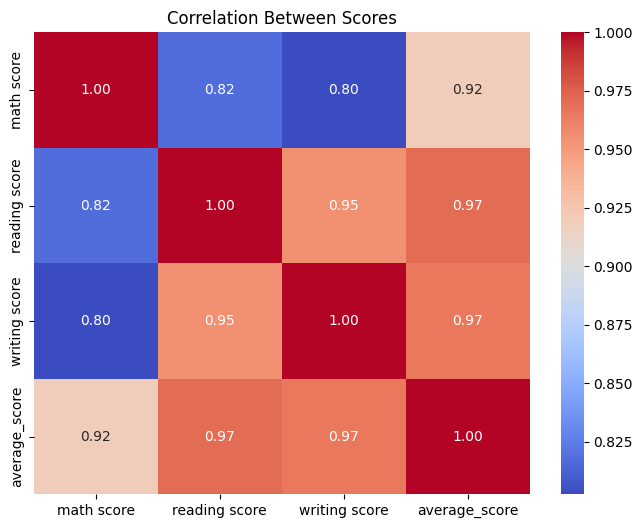

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Scores")
plt.show()


## Step 6: Analyze Score Patterns

We now compare average scores across different groups:  
- **Gender**  
- **Parental Education Level**  
- **Lunch Type**  
- **Test Preparation Course**  

This helps us see which factors influence performance.  


In [35]:
# Gender-wise mean, median, std
df.groupby("gender")[["math score","reading score","writing score"]].agg(["mean","median","std"])

math score                   reading score                    \
             mean median        std          mean median        std   
gender                                                                
female  63.633205   65.0  15.491453     72.608108   73.0  14.378245   
male    68.728216   69.0  14.356277     65.473029   66.0  13.931832   

       writing score                    
                mean median        std  
gender                                  
female     72.467181   74.0  14.844842  
male       63.311203   64.0  14.113832

In [36]:
# Lunch type comparison
df.groupby("lunch")[["math score","reading score","writing score"]].mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [37]:
# Test preparation course effect
df.groupby("test preparation course")[["math score","reading score","writing score"]].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## Step 7: Visualize the Data

Graphs make patterns easier to understand.  
We use bar plots, box plots, violin plots, and pair plots to highlight score distributions and group differences.  


/tmp/ipython-input-778897241.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="average_score", data=df, palette="Set2")


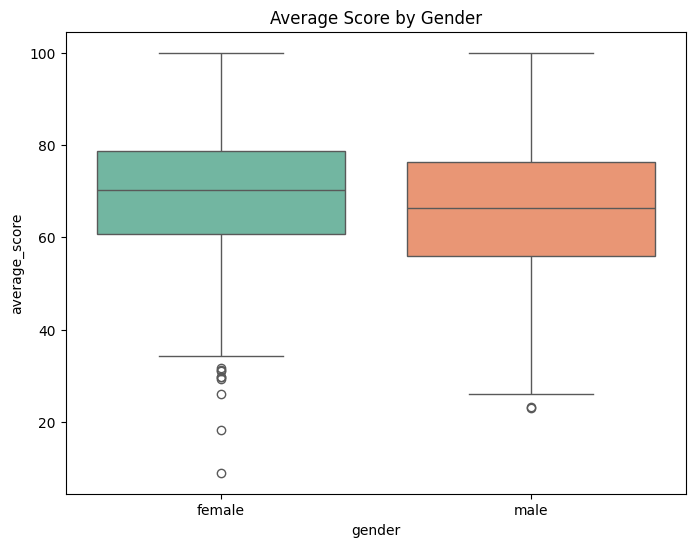

In [38]:
# Boxplot – Gender
plt.figure(figsize=(8,6))
sns.boxplot(x="gender", y="average_score", data=df, palette="Set2")
plt.title("Average Score by Gender")
plt.show()

/tmp/ipython-input-3411301300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="lunch", y="average_score", data=df, palette="muted")


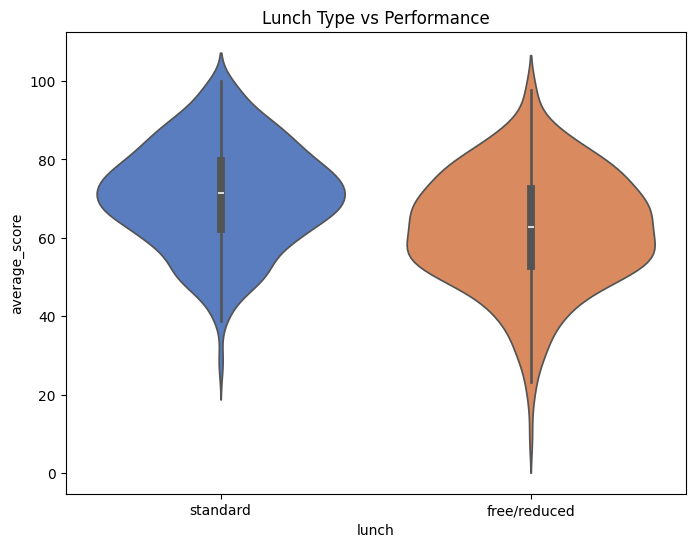

In [39]:
# Violin Plot – Lunch
plt.figure(figsize=(8,6))
sns.violinplot(x="lunch", y="average_score", data=df, palette="muted")
plt.title("Lunch Type vs Performance")
plt.show()

/tmp/ipython-input-4123746407.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="test preparation course", y="average_score", data=df, ci=None, palette="coolwarm")
/tmp/ipython-input-4123746407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="test preparation course", y="average_score", data=df, ci=None, palette="coolwarm")


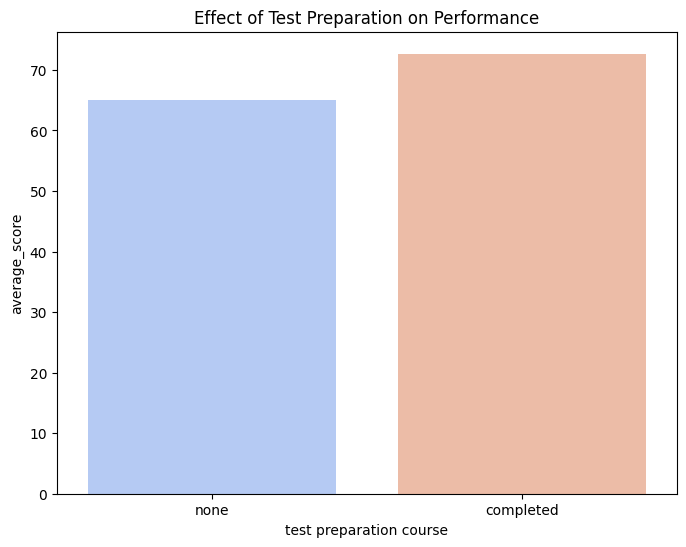

In [40]:
# Test Preparation – Barplot
plt.figure(figsize=(8,6))
sns.barplot(x="test preparation course", y="average_score", data=df, ci=None, palette="coolwarm")
plt.title("Effect of Test Preparation on Performance")
plt.show()

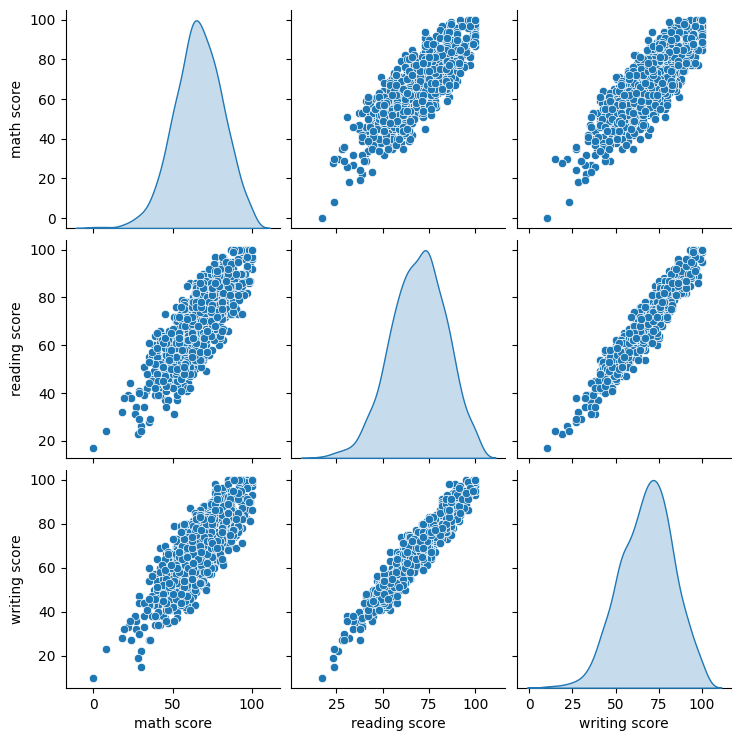

In [41]:
# Pairplot – Relationship among scores
sns.pairplot(df[["math score","reading score","writing score"]], diag_kind="kde")
plt.show()

## Key Insights 📊

1. **Students who completed test preparation** scored **10–15 points higher** on average.  
2. **Standard lunch students** performed significantly better across all subjects compared to free/reduced lunch.  
3. **Female students** performed better in reading & writing, while **males had a slight edge in math**.  
4. Higher **parental education** correlates with better scores, especially in reading.  
5. Strong positive correlation exists between **reading & writing scores (r > 0.9)**.  


## Conclusion

This analysis of the *Students Performance in Exams* dataset highlights several key findings:

- Students who completed the **test preparation course** consistently scored higher in all subjects.  
- **Lunch type** played an important role — students with **standard lunch** performed significantly better than those with free/reduced lunch.  
- **Gender differences** were visible: females excelled in reading & writing, while males performed slightly better in math.  
- **Parental education level** positively influenced student scores, especially in reading.  
- There is a **strong correlation between reading and writing** scores, suggesting these skills are closely related.  




###  Final Note
These insights can help educators, parents, and policymakers design better support systems to improve student learning outcomes. By focusing on test preparation, nutrition, and parental engagement, we can create a more balanced and effective educational environment.